201805032 - Ardıl Silan Aydın
201805016 - Beril Kartal
201805060 - Elif Yılmaz
201805017 - Neslihan Özdil
201805045 - Orhan Gazi Barak
201805040 - Yusuf Çelikkıran

Here, I applied a special process to string columns to digitize the entire data set. First, I separated the string columns from the dataset and repeated the same process for each column separately. I wrote code that showed how many times each word was repeated in a column, and then created a dictionary that held the data I got from there. I then created code that reads the numerical values ​​of words from this dictionary and returns the total numerical value to each line. I also used the number of repetitions as the numerical value of the words. And this way all my string columns have a balanced numerical value. 


In [5]:
import pandas as pd
import string

# CSV dosyasını yükle
df = pd.read_csv("music.csv")

# Noktalama işaretleri filtresi
translator = str.maketrans('', '', string.punctuation)

# Kelime değerlerini hesaplamak için fonksiyon tanımla
def calculate_word_value(column_name):
    # Sütundaki değerleri string olarak al ve boşluklara göre böler
    column_values = df[column_name].str.split()
    
    # Tüm kelimeleri bir listede topla (noktalama işaretlerini kaldırarak)
    all_words = [word.translate(translator) for values in column_values.dropna() for word in values]
    
    # Her kelimenin kaç kez tekrar ettiğini bul
    word_counts = {}
    for word in all_words:
        word_counts[word] = word_counts.get(word, 0) + 1
    
    # Sonuçları bir metin dosyasına kaydet
    with open(f"{column_name}_word_counts_dictionary.txt", "w") as file:
        for word, count in word_counts.items():
            file.write(f"{word}: {count}\n")
    
    # Sözlük dosyasını oku ve her kelimenin sayısal değerini içeren bir sözlük oluştur
    word_values = {}
    with open(f"{column_name}_word_counts_dictionary.txt", "r") as file:
        for line in file:
            word, count = line.strip().split(": ")
            word_values[word] = int(count)
    
    # Her satır için kelime değerlerini topla ve yeni bir sütun oluştur
    df[f"{column_name} Value"] = [sum(word_values.get(word.strip(), 0) for word in str(row[column_name]).split()) for _, row in df.iterrows()]
    
    # Her satırın toplam değerini yazdır
    for index, row in df.iterrows():
        print(f"Satır {index+1} {column_name} Toplam Değer: {row[f'{column_name} Value']}")
    
    # İşlem tamamlandı mesajı
    print(f"{column_name} Value, '{column_name}_with_value.csv' dosyasına başarıyla eklendi.")

# İşlemi belirli sütünler için çağır
calculate_word_value("Track Name")
calculate_word_value("Artist")
calculate_word_value("Artist Genres")
calculate_word_value("Lyrics")

# CSV dosyasını güncellenmiş haliyle kaydet
df.to_csv("music_string_to_numeric.csv", index=False)


Satır 1 Track Name Toplam Değer: 8
Satır 2 Track Name Toplam Değer: 0
Satır 3 Track Name Toplam Değer: 22
Satır 4 Track Name Toplam Değer: 4
Satır 5 Track Name Toplam Değer: 1
Satır 6 Track Name Toplam Değer: 0
Satır 7 Track Name Toplam Değer: 3
Satır 8 Track Name Toplam Değer: 2
Satır 9 Track Name Toplam Değer: 1
Satır 10 Track Name Toplam Değer: 4
Satır 11 Track Name Toplam Değer: 0
Satır 12 Track Name Toplam Değer: 5
Satır 13 Track Name Toplam Değer: 3
Satır 14 Track Name Toplam Değer: 11
Satır 15 Track Name Toplam Değer: 2
Satır 16 Track Name Toplam Değer: 21
Satır 17 Track Name Toplam Değer: 114
Satır 18 Track Name Toplam Değer: 43
Satır 19 Track Name Toplam Değer: 22
Satır 20 Track Name Toplam Değer: 2
Satır 21 Track Name Toplam Değer: 6
Satır 22 Track Name Toplam Değer: 5
Satır 23 Track Name Toplam Değer: 2
Satır 24 Track Name Toplam Değer: 69
Satır 25 Track Name Toplam Değer: 1
Satır 26 Track Name Toplam Değer: 121
Satır 27 Track Name Toplam Değer: 3
Satır 28 Track Name Toplam 

Satır 105 Artist Genres Toplam Değer: 406
Satır 106 Artist Genres Toplam Değer: 1006
Satır 107 Artist Genres Toplam Değer: 451
Satır 108 Artist Genres Toplam Değer: 330
Satır 109 Artist Genres Toplam Değer: 96
Satır 110 Artist Genres Toplam Değer: 387
Satır 111 Artist Genres Toplam Değer: 872
Satır 112 Artist Genres Toplam Değer: 866
Satır 113 Artist Genres Toplam Değer: 859
Satır 114 Artist Genres Toplam Değer: 1162
Satır 115 Artist Genres Toplam Değer: 859
Satır 116 Artist Genres Toplam Değer: 1109
Satır 117 Artist Genres Toplam Değer: 1032
Satır 118 Artist Genres Toplam Değer: 306
Satır 119 Artist Genres Toplam Değer: 917
Satır 120 Artist Genres Toplam Değer: 1043
Satır 121 Artist Genres Toplam Değer: 0
Satır 122 Artist Genres Toplam Değer: 1237
Satır 123 Artist Genres Toplam Değer: 1033
Satır 124 Artist Genres Toplam Değer: 536
Satır 125 Artist Genres Toplam Değer: 721
Satır 126 Artist Genres Toplam Değer: 237
Satır 127 Artist Genres Toplam Değer: 872
Satır 128 Artist Genres Toplam

Satır 1 Lyrics Toplam Değer: 76318
Satır 2 Lyrics Toplam Değer: 102449
Satır 3 Lyrics Toplam Değer: 254265
Satır 4 Lyrics Toplam Değer: 89759
Satır 5 Lyrics Toplam Değer: 83455
Satır 6 Lyrics Toplam Değer: 113489
Satır 7 Lyrics Toplam Değer: 73507
Satır 8 Lyrics Toplam Değer: 96269
Satır 9 Lyrics Toplam Değer: 44208
Satır 10 Lyrics Toplam Değer: 115424
Satır 11 Lyrics Toplam Değer: 95414
Satır 12 Lyrics Toplam Değer: 135017
Satır 13 Lyrics Toplam Değer: 139561
Satır 14 Lyrics Toplam Değer: 89951
Satır 15 Lyrics Toplam Değer: 798
Satır 16 Lyrics Toplam Değer: 66168
Satır 17 Lyrics Toplam Değer: 96390
Satır 18 Lyrics Toplam Değer: 48345
Satır 19 Lyrics Toplam Değer: 82936
Satır 20 Lyrics Toplam Değer: 68625
Satır 21 Lyrics Toplam Değer: 16958
Satır 22 Lyrics Toplam Değer: 31206
Satır 23 Lyrics Toplam Değer: 71642
Satır 24 Lyrics Toplam Değer: 62309
Satır 25 Lyrics Toplam Değer: 42568
Satır 26 Lyrics Toplam Değer: 70940
Satır 27 Lyrics Toplam Değer: 217052
Satır 28 Lyrics Toplam Değer: 56

In [9]:
import pandas as pd
import string

# CSV dosyasını yükle
df = pd.read_csv("music.csv")

# Sütunları sil
df.drop(columns=["Track Name", "Artist", "Artist Genres", "Lyrics","Track Popularity Output","Artist Popularity Output"], inplace=True)
# CSV dosyasını güncellenmiş haliyle kaydet
df.to_csv("music_string_to_numeric.csv", index=False)


Creating New Features

In [14]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("music_string_to_numeric.csv")  # Noktalı virgül (;) ile ayrılmış olarak oku

# Yeni özelliklerin oluşturulması
df['Energy_Danceability'] = df['Energy'] * df['Danceability']
df['Speechiness_Tempo'] = df['Speechiness'] + df['Tempo']
df['Loudness_Acousticness'] = df['Loudness'] - df['Acousticness']
df['Mode_Key'] = df['Mode'] + df['Key']

# Güncellenmiş DataFrame'i göster
print(df.head())

# Güncellenmiş DataFrame'i CSV dosyasına kaydet
df.to_csv("musicdata_with_new_features.csv", index=False)


   Artist Popularity  Track Duration(ms)  Track Popularity  Danceability  \
0                 69              231545                88         0.671   
1                 71              162162                76         0.840   
2                 65              314680                69         0.729   
3                 68              235053                54         0.520   
4                 61              228144                82         0.626   

   Energy  Key  Loudness  Mode  Speechiness  Acousticness  ...    Maximum4  \
0   0.876    7    -5.681     0       0.0352        0.1200  ...  1063.33500   
1   0.629    6    -6.629     0       0.2910        0.1520  ...   762.60240   
2   0.581    5    -8.235     0       0.1800        0.0777  ...   205.38692   
3   0.384    6    -8.168     1       0.0362        0.5960  ...   174.66171   
4   0.583    0    -7.346     0       0.0318        0.2760  ...   578.84380   

    Maximum5  Track Name Value  Artist Value  Artist Genres Value  \
0  43

standardization

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("musicdata_with_new_features.csv")

# Artist Popularity ve Track Popularity sütunlarını ayrı bir değişkende sakla
popularity = df[['Artist Popularity', 'Track Popularity']]

# Diğer sütunları al ve girdi özelliklerini oluştur
X = df.drop(['Artist Popularity', 'Track Popularity'], axis=1)

# StandardScaler nesnelerini oluştur
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# Girdi özelliklerini standartlaştır
X_scaled = scaler_input.fit_transform(X)

# Çıktı özelliklerini standartlaştır
popularity_scaled = scaler_output.fit_transform(popularity)

# Standartlaştırılmış girdi özelliklerini DataFrame'e dönüştür
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Standartlaştırılmış çıktı özelliklerini DataFrame'e dönüştür
popularity_scaled_df = pd.DataFrame(popularity_scaled, columns=['Artist Popularity', 'Track Popularity'])

# Standartlaştırılmış veriyi birleştir
standardized_data = pd.concat([X_scaled_df, popularity_scaled_df], axis=1)

# Standartlaştırılmış veriyi CSV dosyasına kaydet
standardized_data.to_csv('musicdata_standardized.csv', index=False)


Correlation

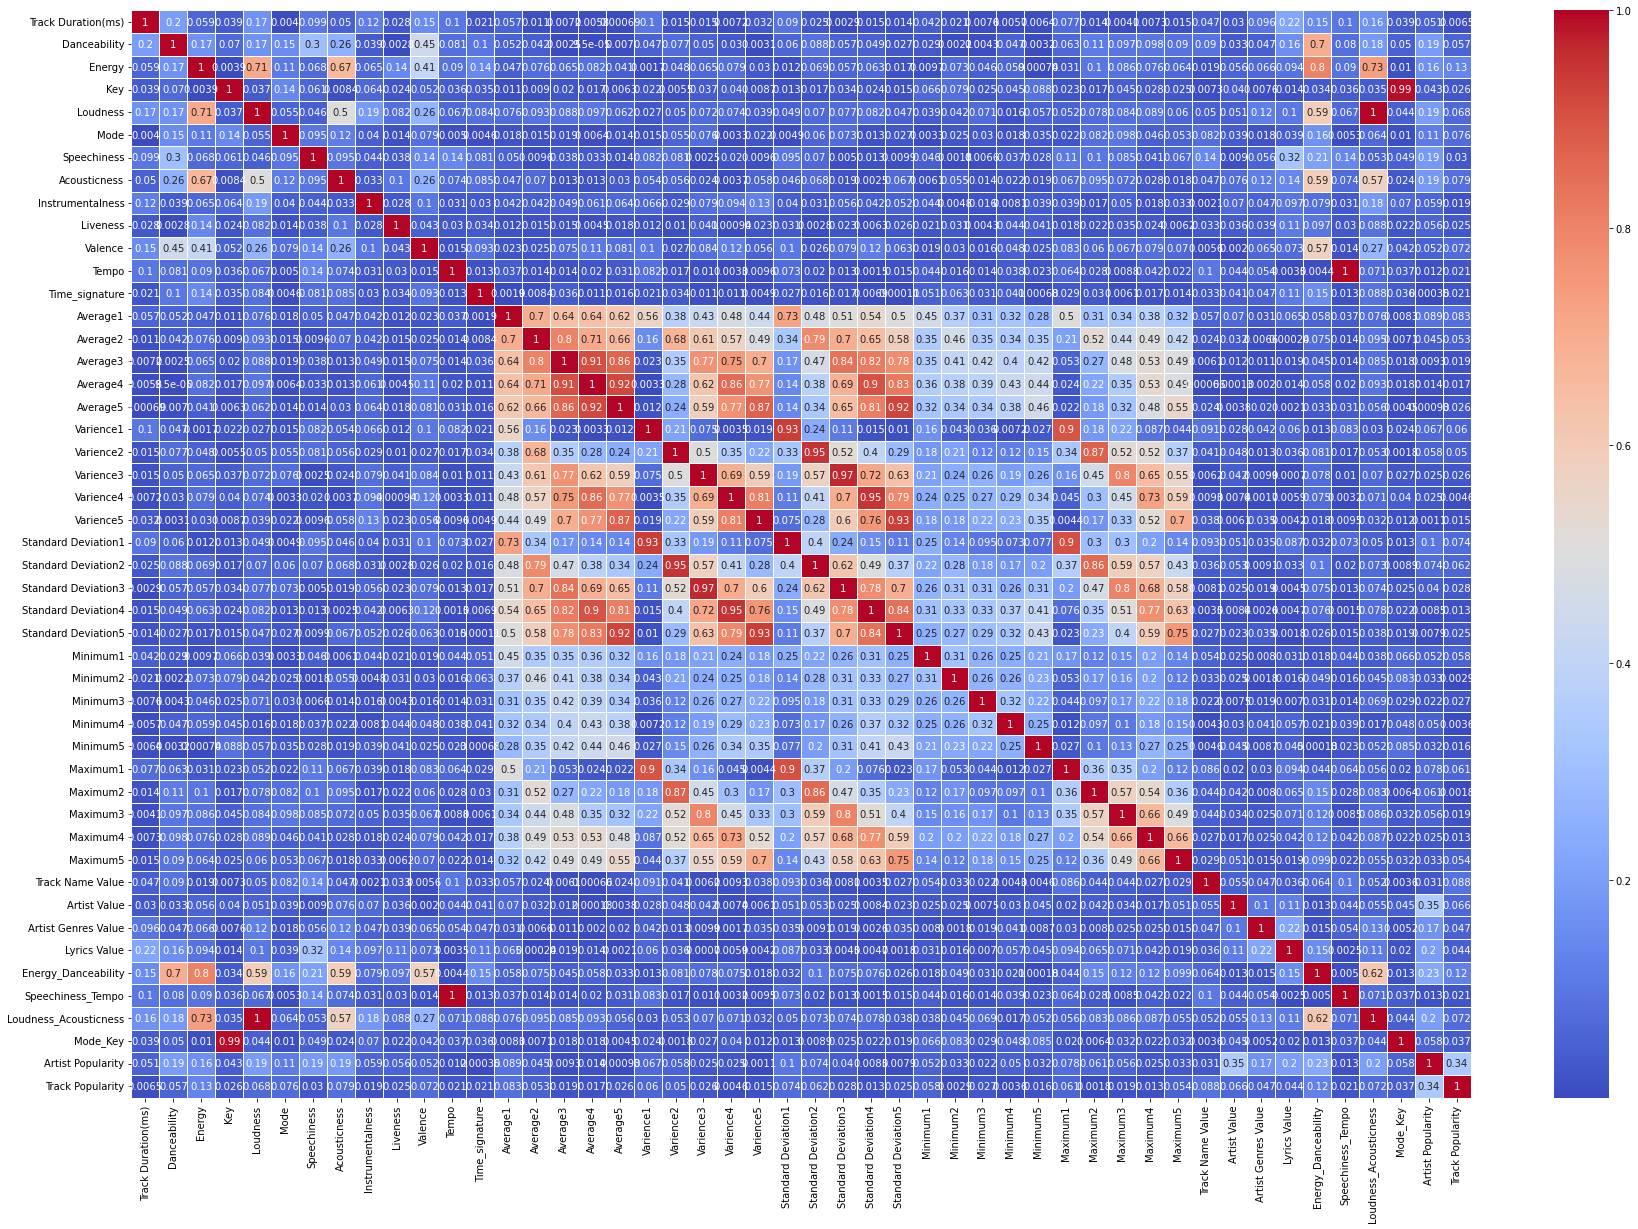

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# final_dataset.csv dosyasını DataFrame'e yükleyin
df = pd.read_csv("musicdata_standardized.csv")

# Sayısal sütunları seçin
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Korelasyon matrisini hesaplayın
correlation_matrix = df[numeric_cols].corr()

# Korelasyon matrisinin her bir öğesinin mutlak değerini alın
absolute_correlation_matrix = correlation_matrix.abs()

# Matristeki değerleri normalize edin (isteğe bağlı olarak)
normalized_correlation_matrix = absolute_correlation_matrix / absolute_correlation_matrix.max().max()

# Korelasyon haritasını çizin
plt.figure(figsize=(30, 20))  # Kutucukları büyütme
sns.heatmap(normalized_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})  # Kutucuk boyutunu belirleme
plt.show()



Graphics
Instead of printing all the graphs, I used orange to create graphs for the input values that affect the output values the most.

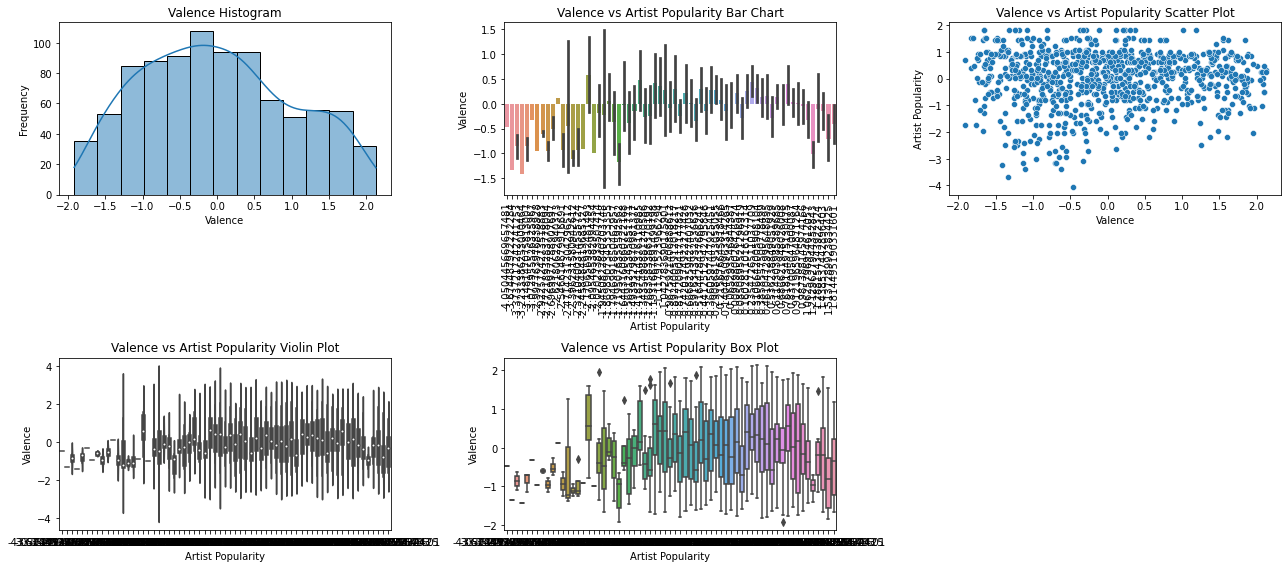

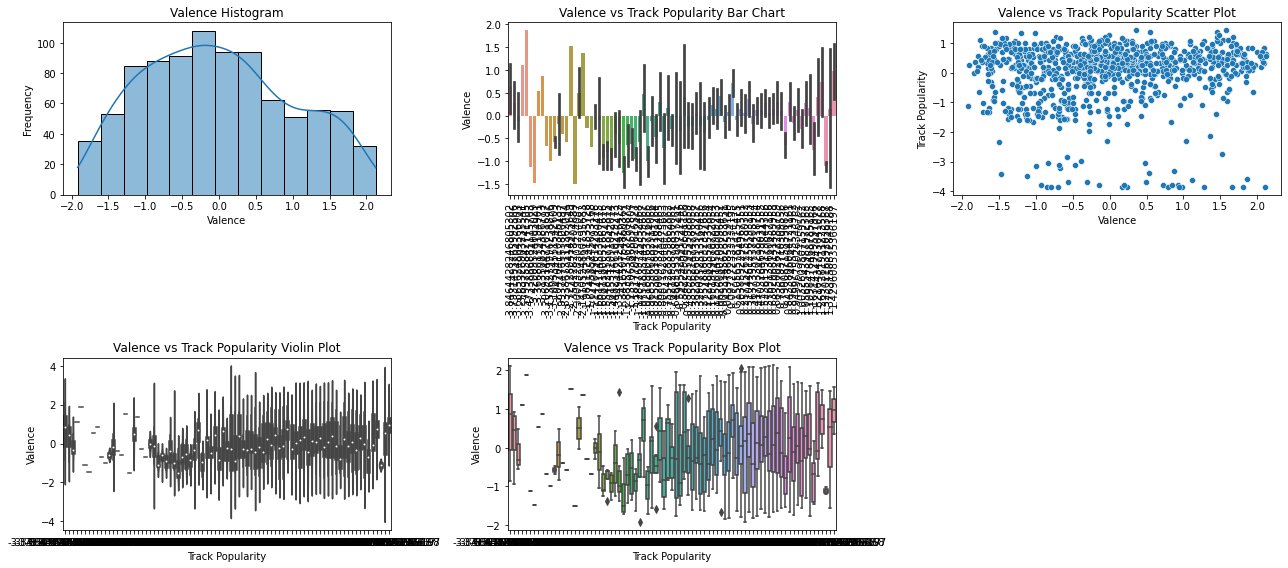

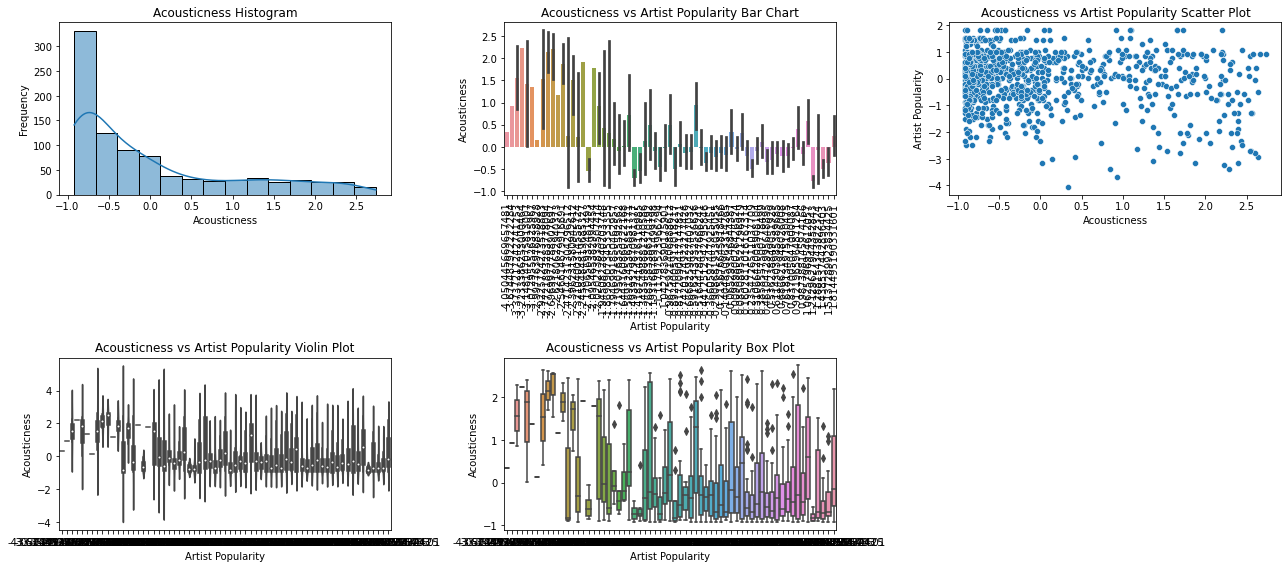

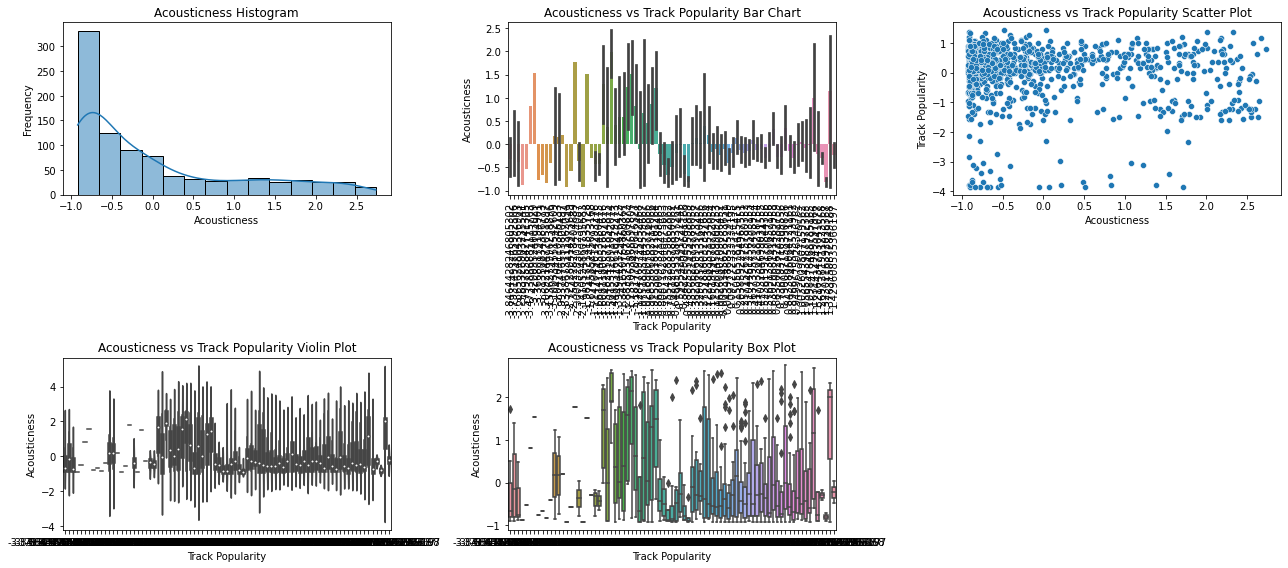

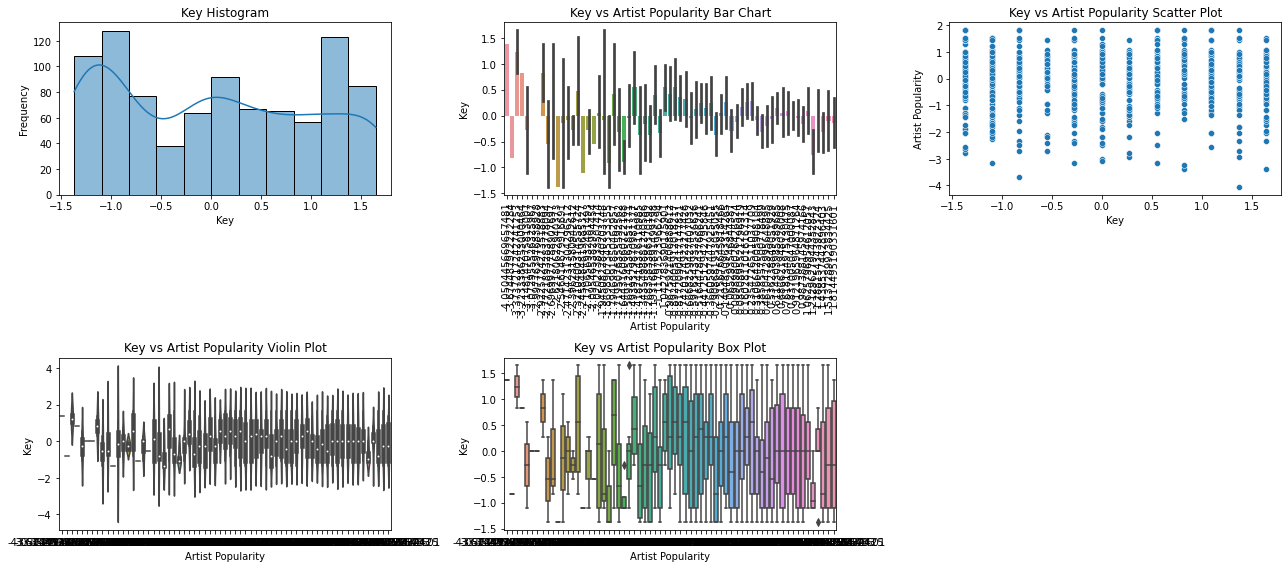

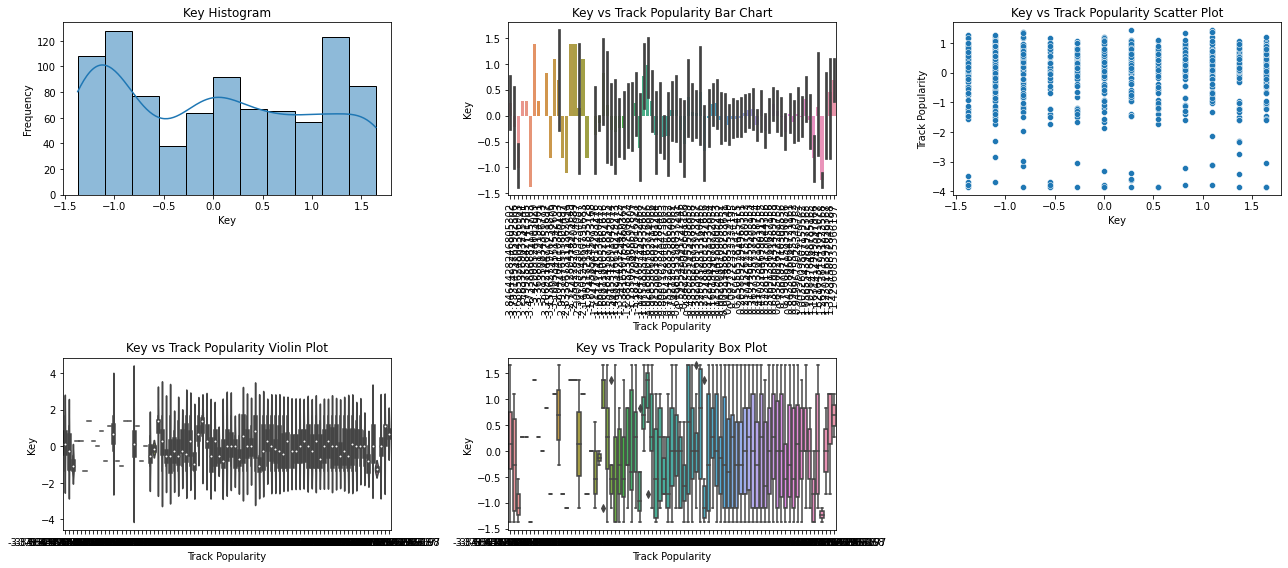

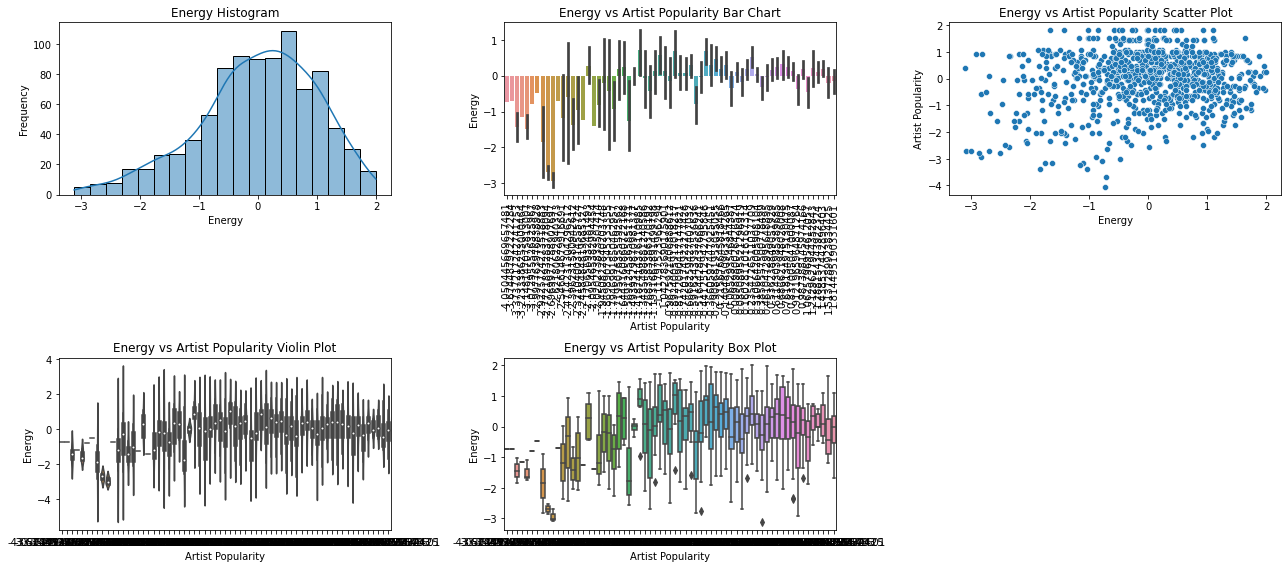

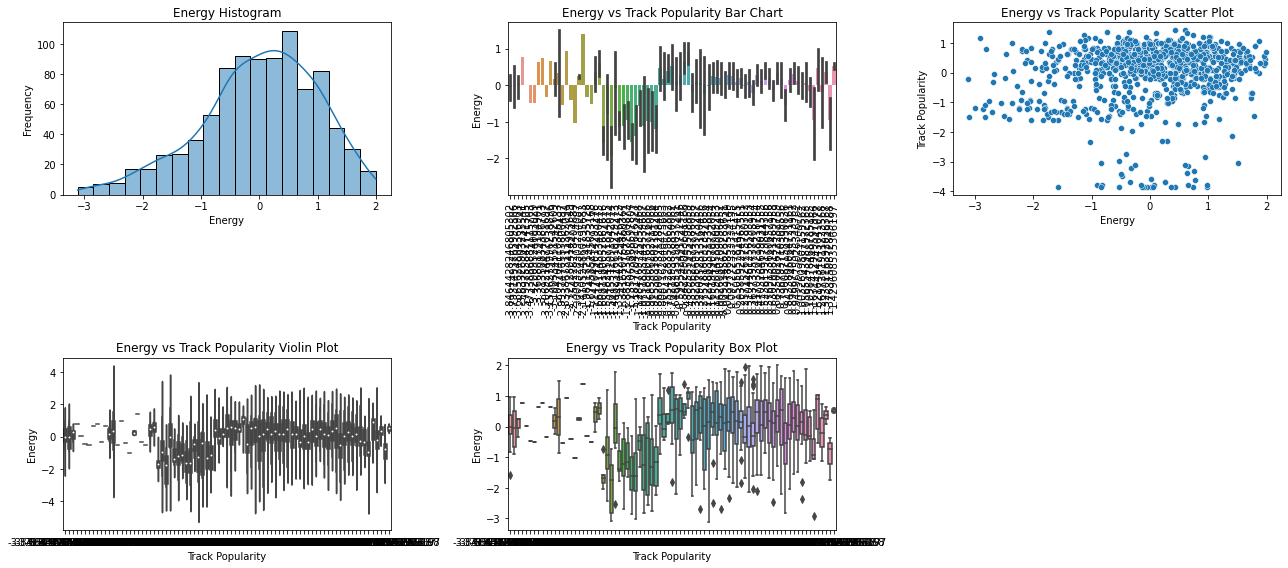

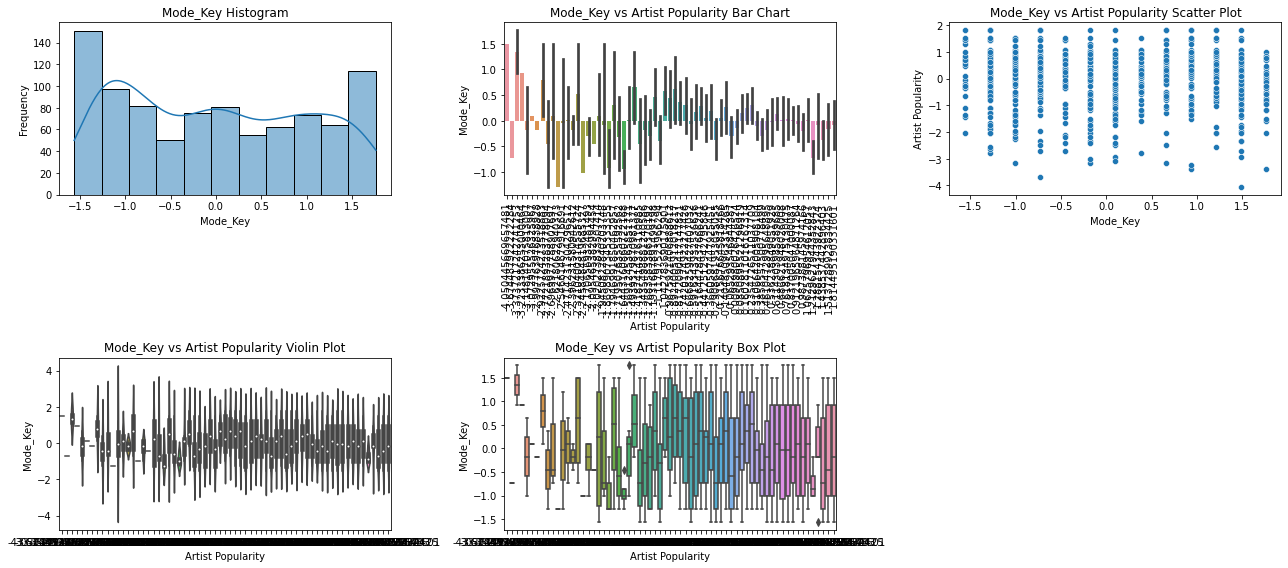

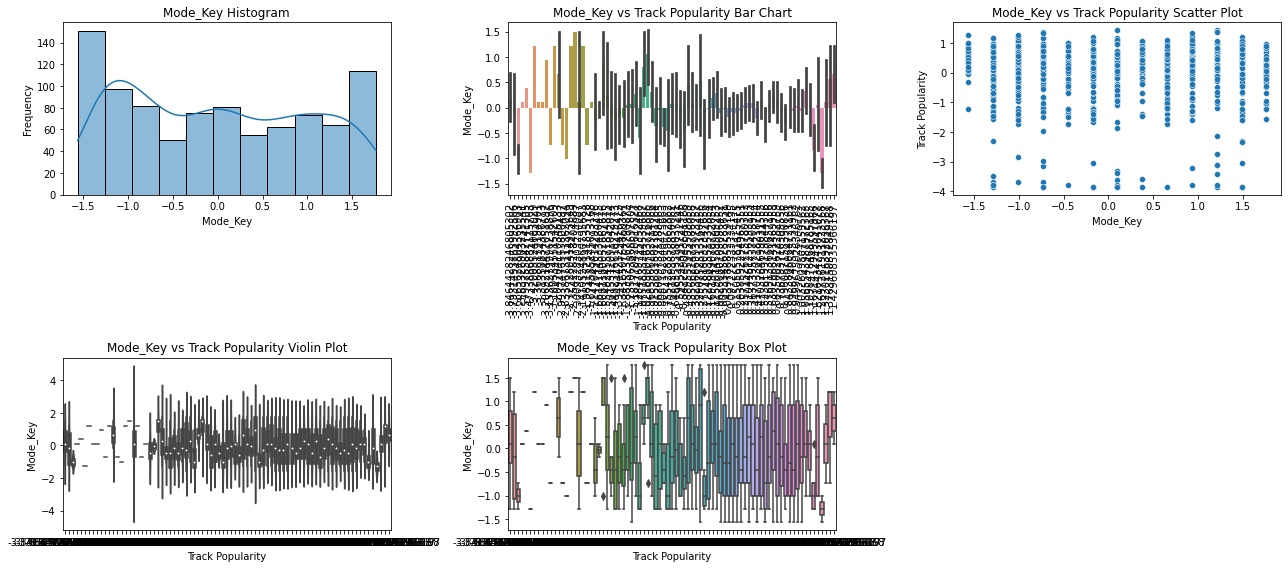

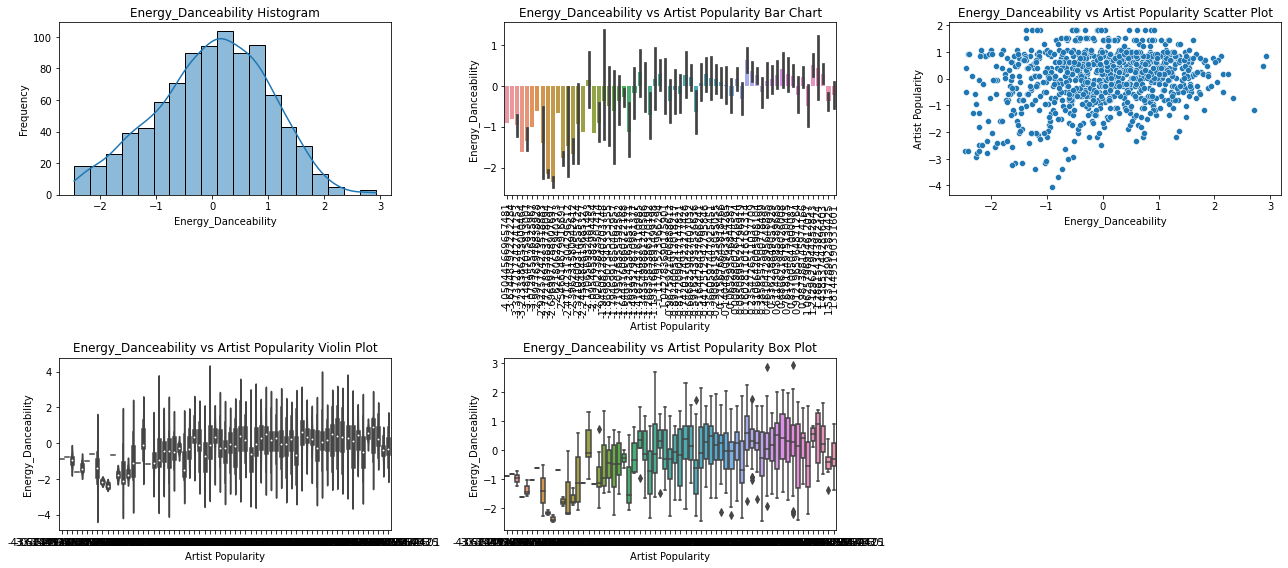

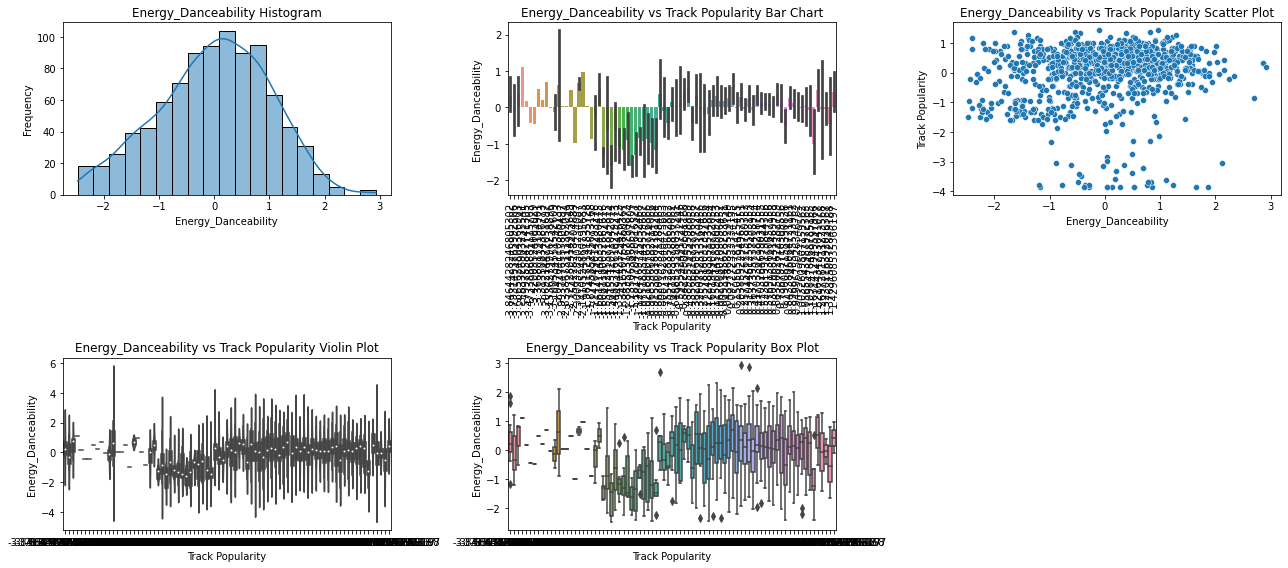

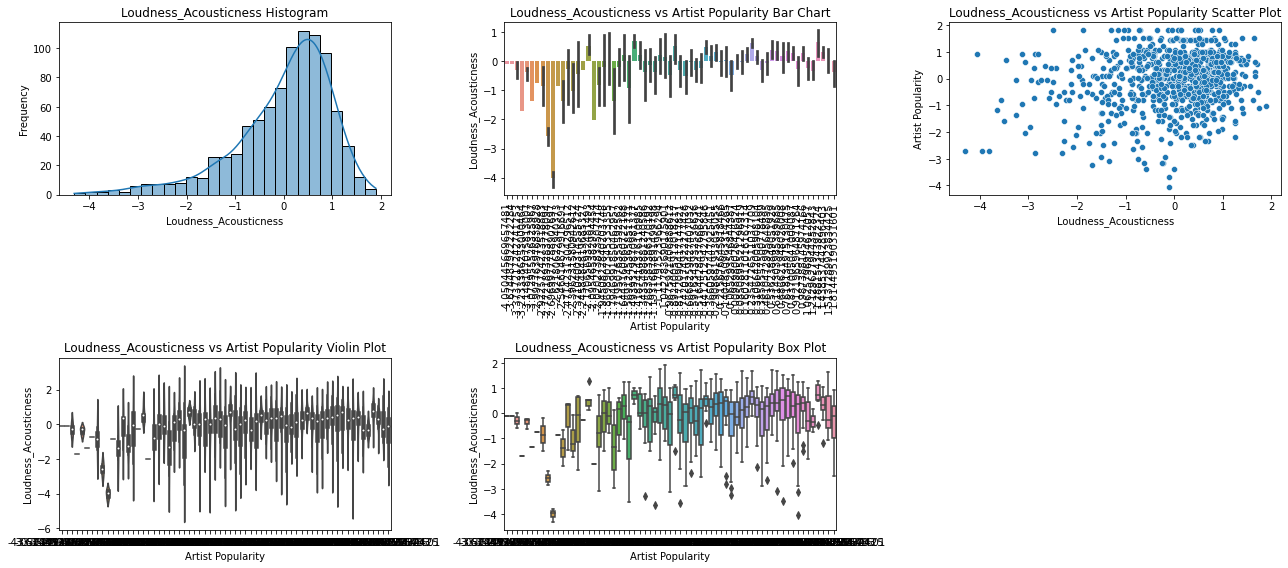

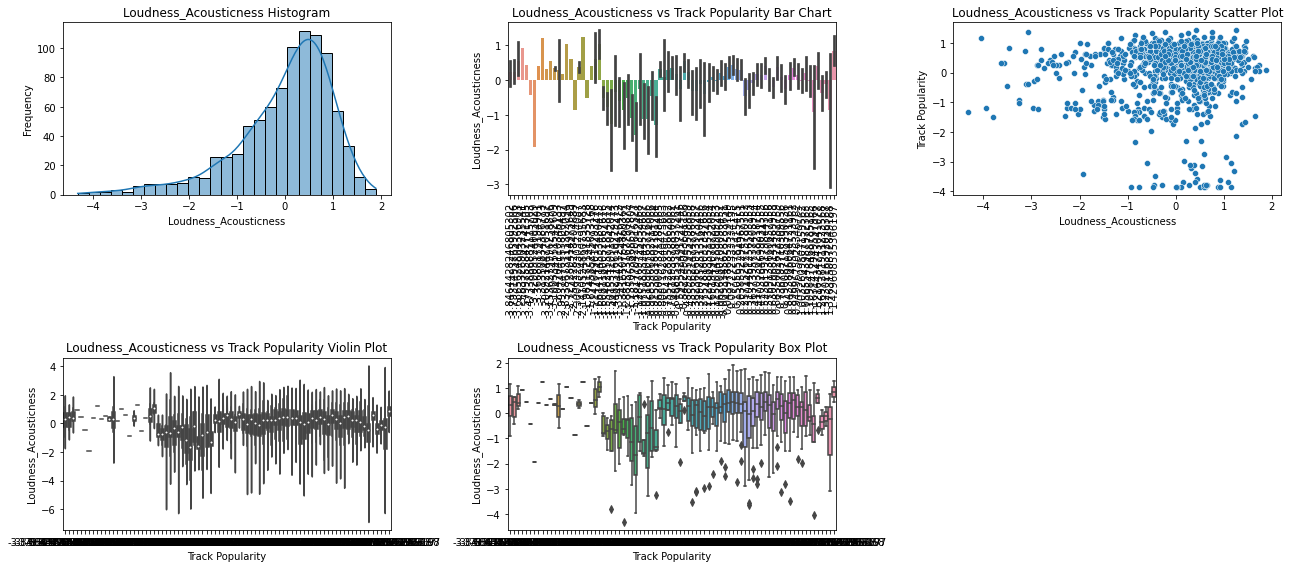

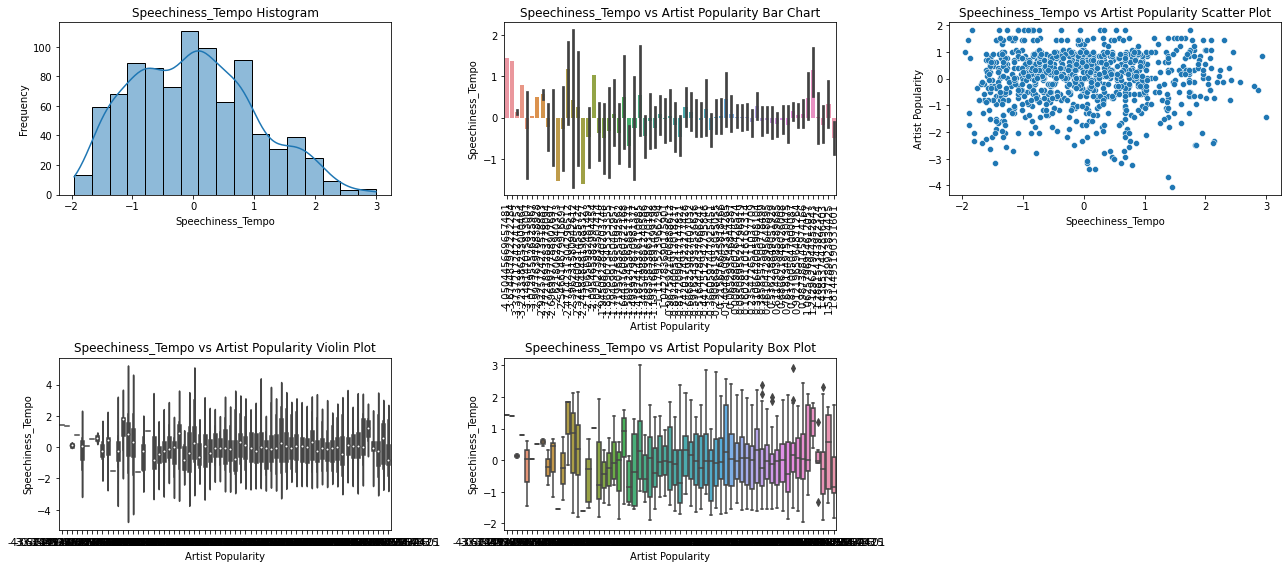

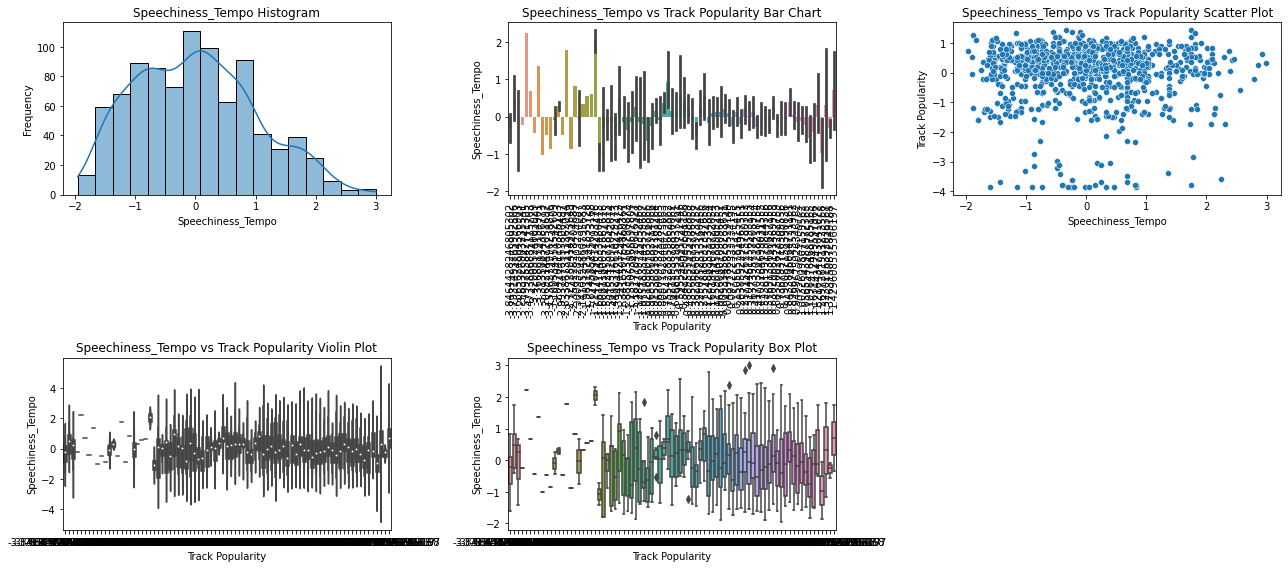

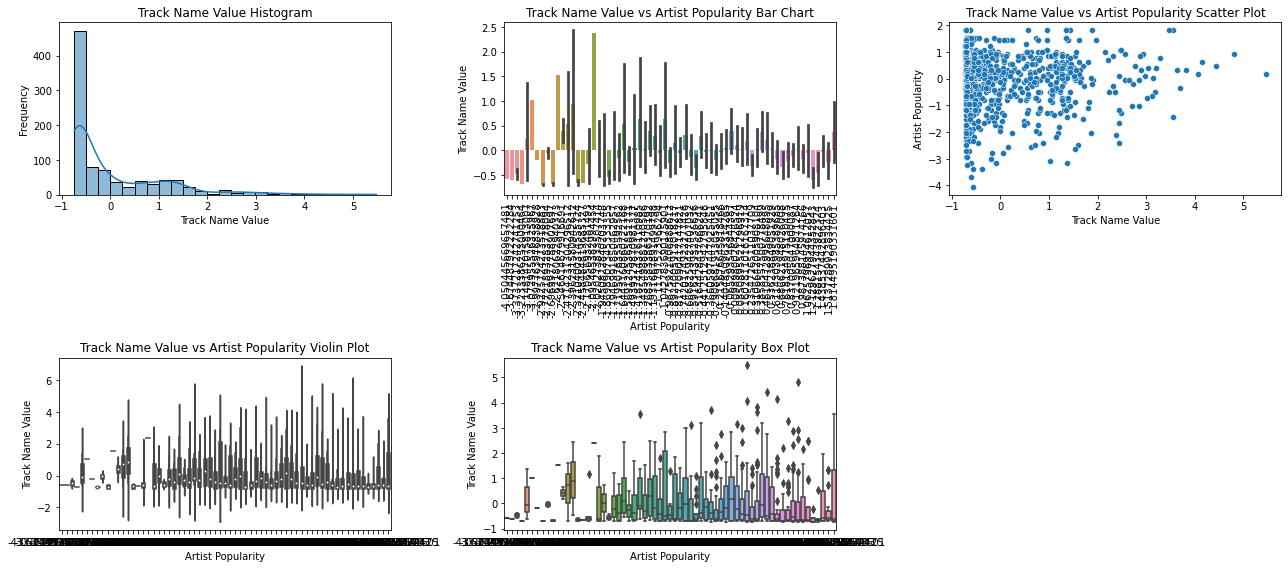

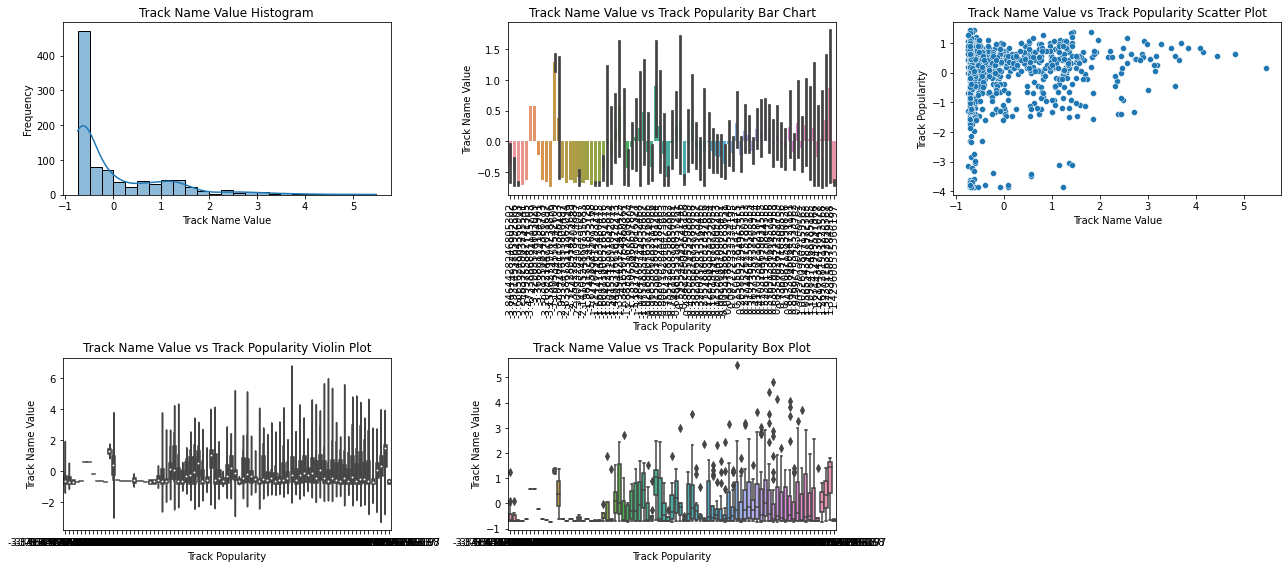

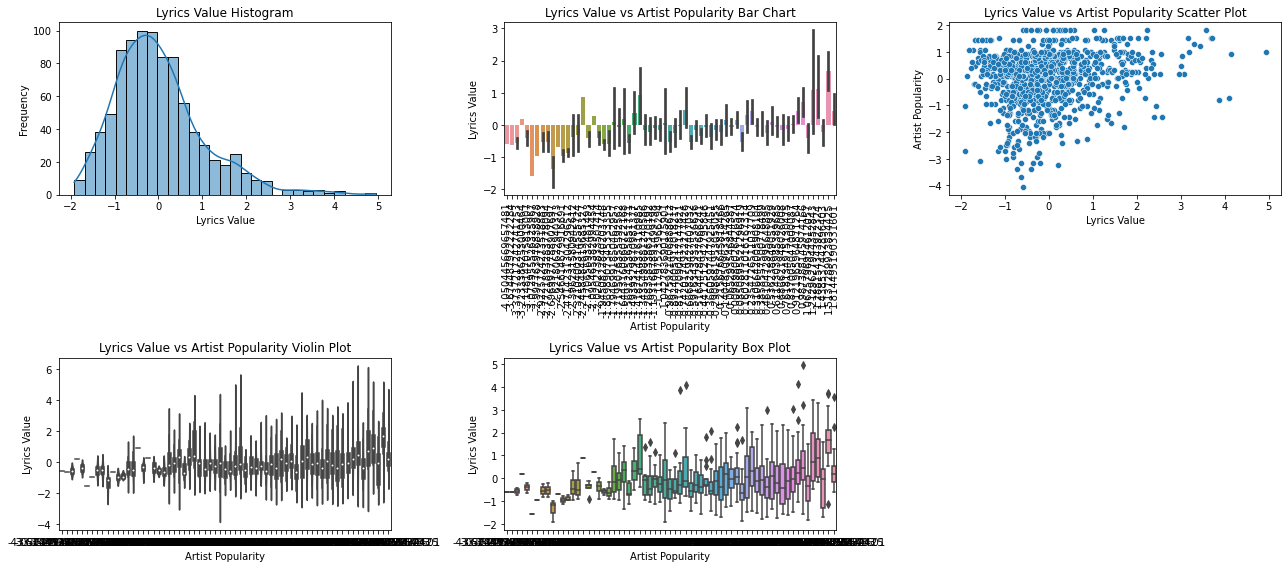

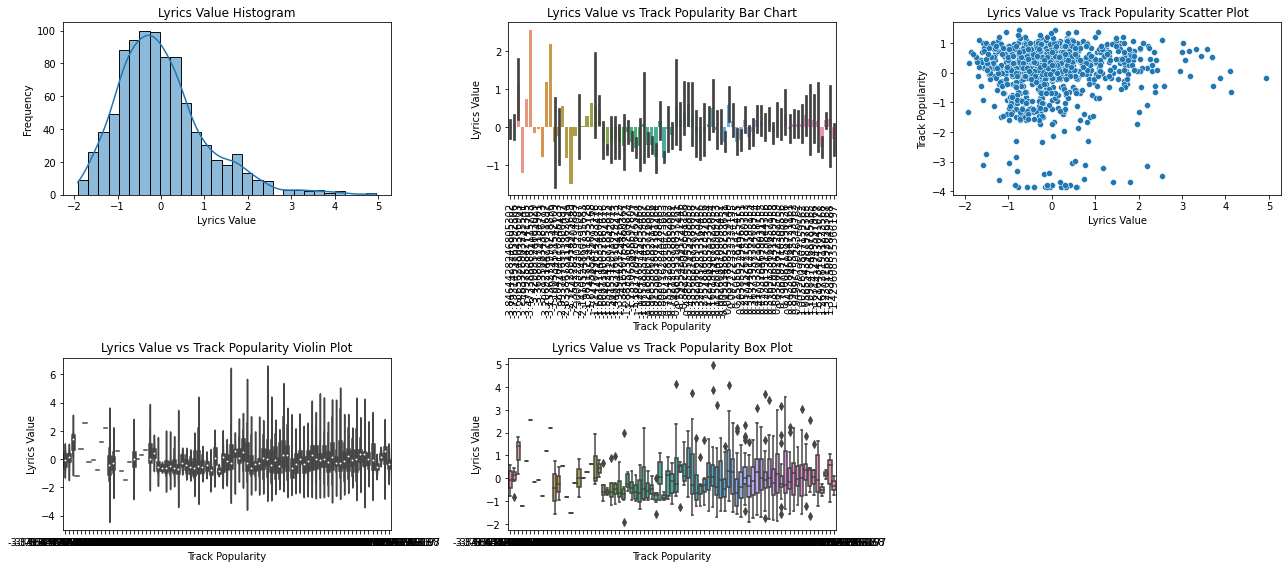

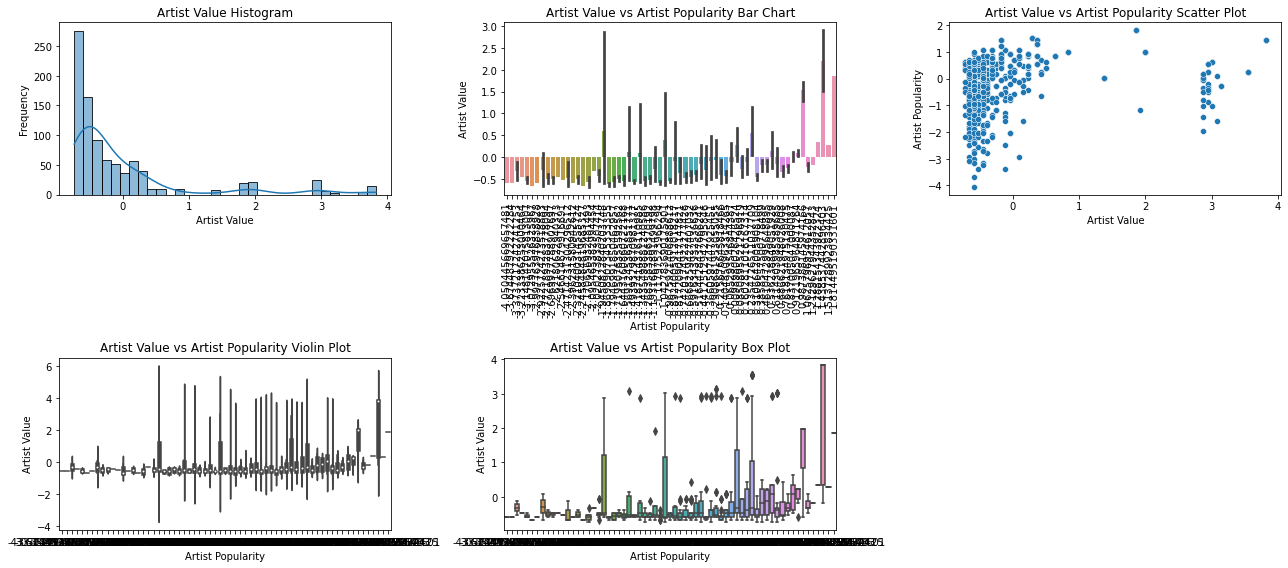

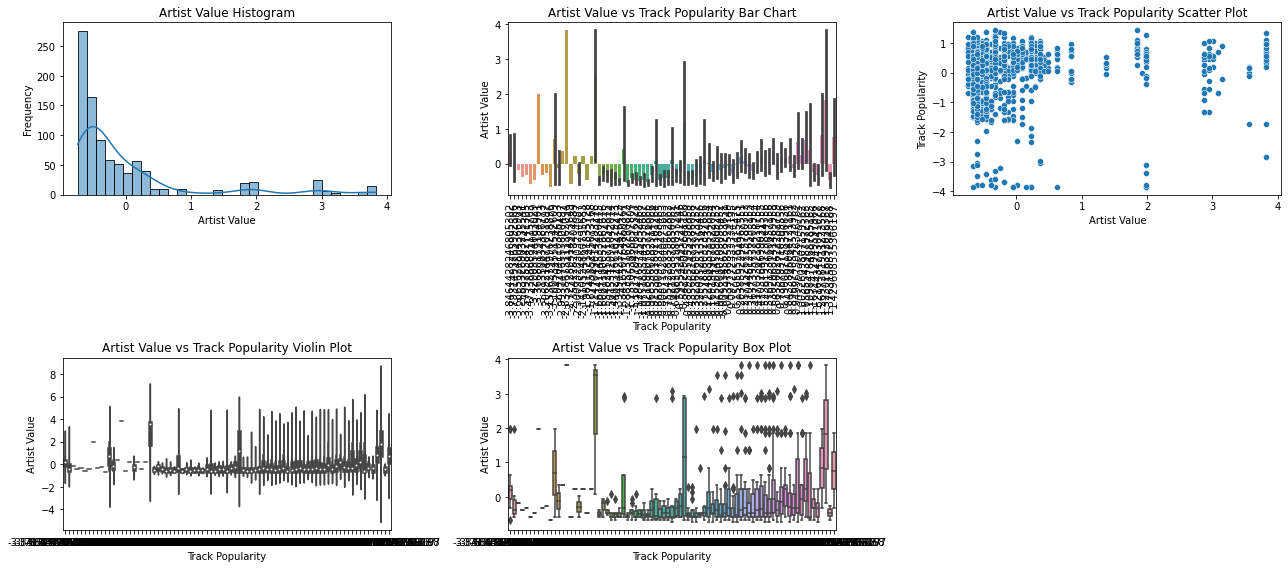

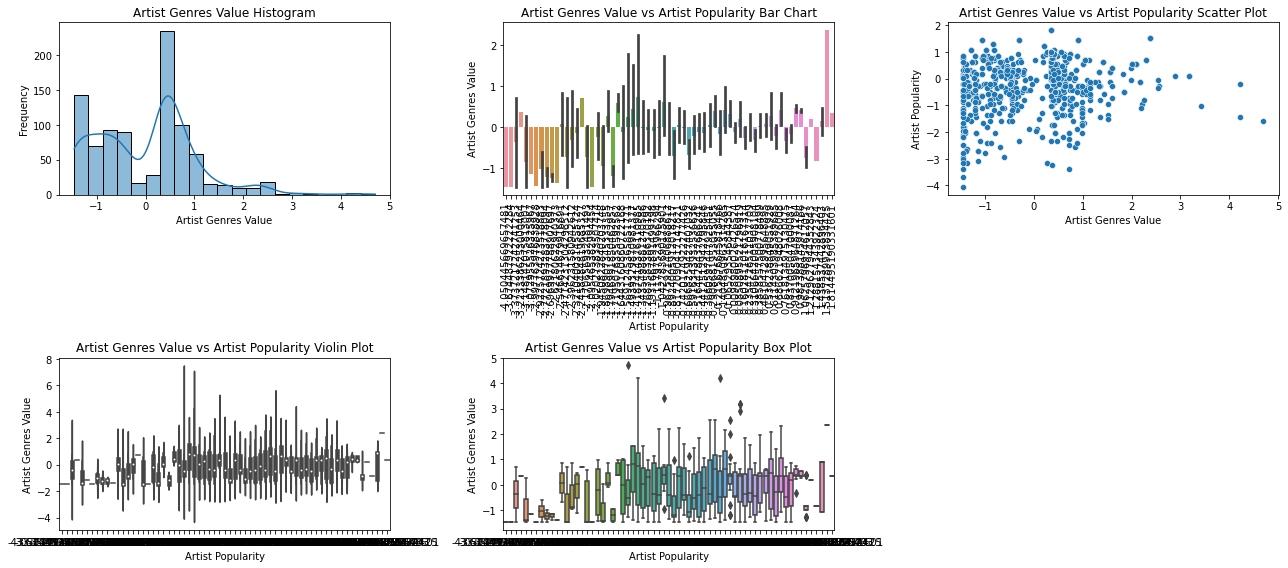

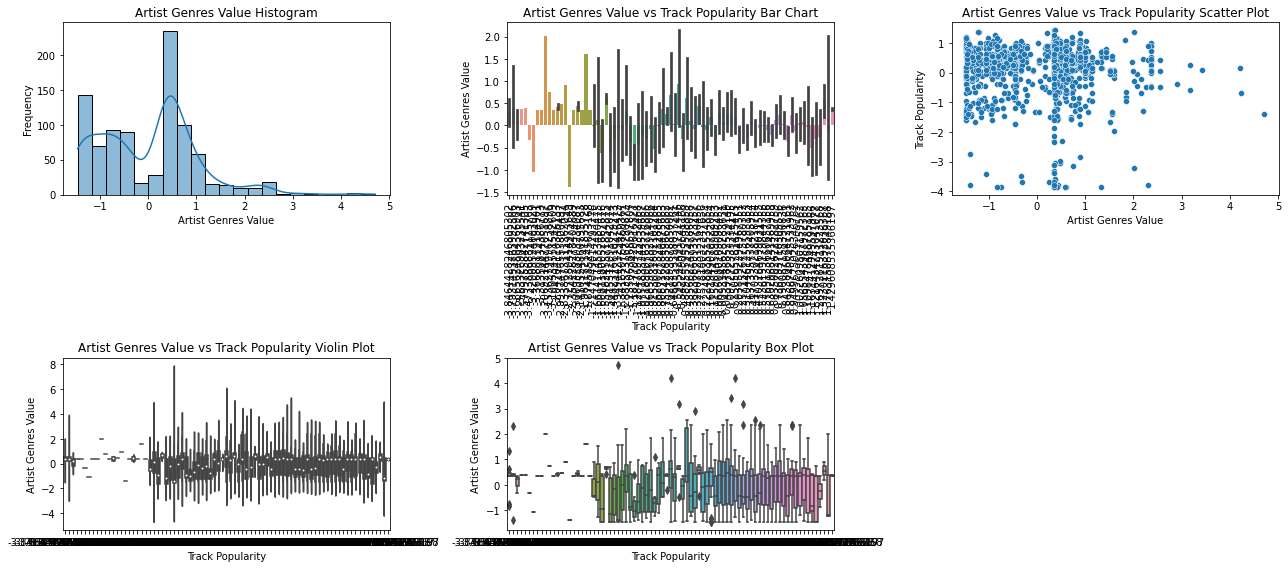

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the standardized dataset 
df = pd.read_csv("musicdata_standardized.csv")

# Define the target columns
target_inputs = ['Valence', 'Acousticness', 'Key','Energy','Mode_Key','Energy_Danceability',
                 'Loudness_Acousticness','Speechiness_Tempo','Track Name Value', 'Lyrics Value', 
                 'Artist Value','Artist Genres Value']
target_outputs = ['Artist Popularity', 'Track Popularity']

# Plotting for each input and output
for input_feature in target_inputs:
    for output_feature in target_outputs:
        plt.figure(figsize=(18, 8))
        
        # Histogram
        plt.subplot(2, 3, 1)
        sns.histplot(data=df, x=input_feature, kde=True)
        plt.title(f'{input_feature} Histogram')
        plt.xlabel(input_feature)
        plt.ylabel('Frequency')
        
        # Bar Chart
        plt.subplot(2, 3, 2)
        sns.barplot(data=df, x=output_feature, y=input_feature)
        plt.title(f'{input_feature} vs {output_feature} Bar Chart')
        plt.xlabel(output_feature)
        plt.ylabel(input_feature)
        plt.xticks(rotation=90)
        
        # Scatter Plot
        plt.subplot(2, 3, 3)
        sns.scatterplot(data=df, x=input_feature, y=output_feature)
        plt.title(f'{input_feature} vs {output_feature} Scatter Plot')
        plt.xlabel(input_feature)
        plt.ylabel(output_feature)
        
        # Violin Plot
        plt.subplot(2, 3, 4)
        sns.violinplot(data=df, x=output_feature, y=input_feature)
        plt.title(f'{input_feature} vs {output_feature} Violin Plot')
        plt.xlabel(output_feature)
        plt.ylabel(input_feature)
        
        # Box Plot
        plt.subplot(2, 3, 5)
        sns.boxplot(data=df, x=output_feature, y=input_feature)
        plt.title(f'{input_feature} vs {output_feature} Box Plot')
        plt.xlabel(output_feature)
        plt.ylabel(input_feature)
        
        plt.tight_layout()
        plt.show()


Model

In [2]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd
import joblib

# Veri setini yükle
data = pd.read_csv("musicdata_standardized.csv")

# Bağımsız değişkenler ve hedef değişkenleri ayır
X = data.drop(columns=["Artist Popularity", "Track Popularity"])
y_artist = data["Artist Popularity"]
y_track = data["Track Popularity"]

# Veri setini %80 eğitim, %20 test olarak ayırma
X_train_artist, X_test_artist, y_train_artist, y_test_artist = train_test_split(X, y_artist, test_size=0.2, random_state=47)
X_train_track, X_test_track, y_train_track, y_test_track = train_test_split(X, y_track, test_size=0.2, random_state=47)

# Model tanımları
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

best_model_name_artist = None
best_score_artist = -1

# Artist Popularity için model seçimi ve performans ölçümü
print("Artist Popularity için Modellerin Değerlendirilmesi:")
print("--------------------------------------")
for name, model in models.items():
    # Çapraz doğrulama ile modeli değerlendir
    cv_scores_artist = cross_val_score(model, X_train_artist, y_train_artist, cv=10, scoring='r2')
    mean_score_artist = cv_scores_artist.mean()

    if mean_score_artist > best_score_artist:
        best_score_artist = mean_score_artist
        best_model_name_artist = name
        
    # Modeli eğitim seti üzerinde eğit
    model.fit(X_train_artist, y_train_artist)
    
    # Test R^2 hesapla
    test_predictions_artist = model.predict(X_test_artist)
    test_r2_artist = r2_score(y_test_artist, test_predictions_artist)
    
    # Eğitim R^2 hesapla
    train_predictions_artist = model.predict(X_train_artist)
    train_r2_artist = r2_score(y_train_artist, train_predictions_artist)
    
    # Sonuçları yazdır
    print(f"{name}: Cross-validated R^2 scores: {cv_scores_artist}")
    print(f"{name}: Average Cross-validated R^2 score: {mean_score_artist}")
    print(f"{name}: Test R^2 score = {test_r2_artist}")
    print(f"{name}: Train R^2 score = {train_r2_artist}")
    print("--------------------------------------")

# En iyi modeli seç (Artist Popularity için)
best_model_artist = models[best_model_name_artist]

# Track Popularity için model seçimi ve performans ölçümü
best_model_name_track = None
best_score_track = -1

print("\nTrack Popularity için Modellerin Değerlendirilmesi:")
print("--------------------------------------")
for name, model in models.items():
    # Çapraz doğrulama ile modeli değerlendir
    cv_scores_track = cross_val_score(model, X_train_track, y_train_track, cv=10, scoring='r2')
    mean_score_track = cv_scores_track.mean()

    if mean_score_track > best_score_track:
        best_score_track = mean_score_track
        best_model_name_track = name
        
    # Modeli eğitim seti üzerinde eğit
    model.fit(X_train_track, y_train_track)
    
    # Test R^2 hesapla
    test_predictions_track = model.predict(X_test_track)
    test_r2_track = r2_score(y_test_track, test_predictions_track)
    
    # Eğitim R^2 hesapla
    train_predictions_track = model.predict(X_train_track)
    train_r2_track = r2_score(y_train_track, train_predictions_track)
    
    # Sonuçları yazdır
    print(f"{name}: Cross-validated R^2 scores: {cv_scores_track}")
    print(f"{name}: Average Cross-validated R^2 score: {mean_score_track}")
    print(f"{name}: Test R^2 score = {test_r2_track}")
    print(f"{name}: Train R^2 score = {train_r2_track}")
    print("--------------------------------------")

# En iyi modeli seç (Track Popularity için)
best_model_track = models[best_model_name_track]

# Artist Popularity için en iyi modelin performansını hesapla
best_model_artist.fit(X_train_artist, y_train_artist)
train_predictions_artist = best_model_artist.predict(X_train_artist)
train_r2_best_artist = r2_score(y_train_artist, train_predictions_artist)
test_predictions_artist = best_model_artist.predict(X_test_artist)
test_r2_best_artist = r2_score(y_test_artist, test_predictions_artist)

# Track Popularity için en iyi modelin performansını hesapla
best_model_track.fit(X_train_track, y_train_track)
train_predictions_track = best_model_track.predict(X_train_track)
train_r2_best_track = r2_score(y_train_track, train_predictions_track)
test_predictions_track = best_model_track.predict(X_test_track)
test_r2_best_track = r2_score(y_test_track, test_predictions_track)

# En iyi modelin adını ve performansını yazdır (Artist Popularity)
print(f"\nEn iyi model (Artist Popularity): {best_model_name_artist}, Ortalama çapraz doğrulama R^2: {best_score_artist}")
print(f"En iyi model ({best_model_name_artist}): Eğitim R^2 skoru = {train_r2_best_artist}, Test R^2 skoru = {test_r2_best_artist}")

# En iyi modelin adını ve performansını yazdır (Track Popularity)
print(f"\nEn iyi model (Track Popularity): {best_model_name_track}, Ortalama çapraz doğrulama R^2: {best_score_track}")
print(f"En iyi model ({best_model_name_track}): Eğitim R^2 skoru = {train_r2_best_track}, Test R^2 skoru = {test_r2_best_track}")

# En iyi modeli diske kaydet
joblib.dump(best_model_artist, 'Best_Model_Artist_Popularity.pkl')
joblib.dump(best_model_track, 'Best_Model_Track_Popularity.pkl')


Artist Popularity için Modellerin Değerlendirilmesi:
--------------------------------------
Linear Regression: Cross-validated R^2 scores: [ 0.0852555   0.28578778  0.17472238 -0.06608697 -0.01002224  0.07312319
  0.33617346  0.11478245  0.11477528  0.11996567]
Linear Regression: Average Cross-validated R^2 score: 0.12284765094724301
Linear Regression: Test R^2 score = 0.10646317622655166
Linear Regression: Train R^2 score = 0.298802176888492
--------------------------------------
Decision Tree Regression: Cross-validated R^2 scores: [-0.15881753  0.0345896   0.33048459  0.06593819 -0.11122539 -0.60587755
  0.09557732 -0.44097927  0.09496272  0.11427248]
Decision Tree Regression: Average Cross-validated R^2 score: -0.05810748447163418
Decision Tree Regression: Test R^2 score = -0.23292091398273307
Decision Tree Regression: Train R^2 score = 1.0
--------------------------------------
Random Forest Regression: Cross-validated R^2 scores: [0.46351426 0.47690744 0.54100846 0.51156401 0.370

['Best_Model_Track_Popularity.pkl']